In [77]:
import torch
import numpy as np
from lucent.optvis import render, param
from model import CNN
import transform

In [78]:
from torchvision import models, transforms
model = models.googlenet(pretrained = True)
model.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [79]:
# freeze the model
for p in model.parameters():
    p.requires_grad_(False)

# get the layers
layers = list(map(lambda x: x[0], model.named_children()))
print(layers)

['conv1', 'maxpool1', 'conv2', 'conv3', 'maxpool2', 'inception3a', 'inception3b', 'maxpool3', 'inception4a', 'inception4b', 'inception4c', 'inception4d', 'inception4e', 'maxpool4', 'inception5a', 'inception5b', 'avgpool', 'dropout', 'fc']


In [80]:
# create a forward hook
activation = {} # dictionary to store the activation of a layer

def create_hook(name):
    def hook(m, i, o):
    # copy the output of the given layer
        activation[name] = o

    return hook

model.inception4a.register_forward_hook(create_hook("inception4a"))

In [81]:
# generate the random input image
img = torch.rand((3, 28, 28))

In [82]:
model(img.unsqueeze(0))

tensor([[-6.7881e-01, -5.7220e-01, -2.8935e-01, -1.4225e-01,  1.4569e+00,
          8.9584e-01,  1.9601e-01, -9.0950e-01, -7.7971e-01, -5.4026e-03,
         -7.7651e-02, -1.2346e-01, -7.6825e-01, -1.0262e-01, -2.4186e-01,
         -4.5195e-01, -4.9772e-01, -7.0273e-01,  5.7339e-01, -7.8584e-01,
          3.7071e-01,  1.1333e+00,  2.6281e-01,  5.2314e-01,  1.3442e-01,
          7.7104e-01,  8.6843e-01,  4.4823e-02, -3.1639e-02, -8.5755e-01,
         -2.8864e-01, -7.4944e-01, -8.8197e-03, -1.6427e-01,  1.8402e+00,
          5.2598e-02, -3.0732e-01, -8.4508e-01, -6.7735e-03,  9.0560e-02,
         -8.5389e-01,  4.2674e-02,  9.7651e-01, -4.3192e-01,  1.2133e-01,
          1.2241e+00, -2.3371e-01,  1.8156e-01,  1.4970e+00,  6.9373e-01,
          4.7038e-01, -1.1524e+00,  1.0648e+00,  5.0551e-01,  1.1599e+00,
          3.8050e-01,  6.1253e-01, -1.6823e-01,  4.1887e-01, -2.6141e-01,
          5.8541e-01, -1.5886e-01,  5.3447e-01,  4.4534e-01, -7.3373e-01,
          1.4056e+00,  1.0362e+00,  6.

In [83]:
activation["inception4a"].shape

torch.Size([1, 512, 1, 1])

In [98]:
img = torch.rand((3, 128, 128), requires_grad=True)
optimizer = torch.optim.Adam([img], lr=0.5)

transform_f = transform.compose(transform.standard_transforms)

In [99]:
for i in range(512):
    optimizer.zero_grad()
    model_out = model(transform_f(img.unsqueeze(0)))
    layer_out = activation['inception4a']

    # optimize the first channel:
    base_loss = layer_out[0, 0].mean()
    #print(base_loss)

    loss = -base_loss
    print(f"#{i}", loss.item())
    loss.backward()
    optimizer.step()

#0 -0.0
#1 -0.0022760897409170866
#2 -0.005578645970672369
#3 -0.019528541713953018
#4 -0.06111869215965271
#5 -0.10387563705444336
#6 -0.13402394950389862
#7 -0.15403464436531067
#8 -0.2795424163341522
#9 -0.33567342162132263
#10 -0.41650325059890747
#11 -0.5091416835784912
#12 -0.6654114127159119
#13 -0.7189012765884399
#14 -0.9222627878189087
#15 -0.9191425442695618
#16 -1.10964035987854
#17 -1.3542399406433105
#18 -1.5075756311416626
#19 -1.6172364950180054
#20 -1.6053303480148315
#21 -1.8496921062469482
#22 -1.8000024557113647
#23 -2.3606200218200684
#24 -2.2226898670196533
#25 -2.5197479724884033
#26 -2.3415744304656982
#27 -3.1022379398345947
#28 -3.0624771118164062
#29 -3.0417888164520264
#30 -3.018092155456543
#31 -3.3603224754333496
#32 -3.460444688796997
#33 -3.9263267517089844
#34 -3.9439356327056885
#35 -3.8811938762664795
#36 -4.3783650398254395
#37 -4.432966709136963
#38 -4.569098949432373
#39 -5.501894950866699
#40 -5.194156646728516
#41 -5.558407783508301
#42 -5.611212

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


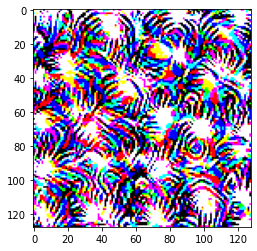

In [103]:
import matplotlib.pyplot as plt

def tensor_to_img_array(tensor):
    image = tensor.cpu().detach().numpy()
    image = np.transpose(image, [0, 2, 3, 1])
    return image

plt.imshow(tensor_to_img_array(img.unsqueeze(0))[0])

Initial loss: -0.075


100%|█████████▉| 510/512 [00:40<00:00,  9.77it/s]

Loss at step 512: -5.023



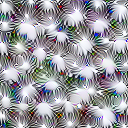

100%|██████████| 512/512 [00:41<00:00, 12.48it/s]



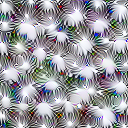

[array([[[[0.67149204, 0.67495245, 0.71701074],
          [0.1963459 , 0.20351613, 0.22812606],
          [0.7673834 , 0.79886407, 0.8080025 ],
          ...,
          [0.60420924, 0.6249178 , 0.61840945],
          [0.6944285 , 0.73593485, 0.78861344],
          [0.24936119, 0.23008876, 0.26303643]],
 
         [[0.94677913, 0.9537011 , 0.9651781 ],
          [0.36263365, 0.33511865, 0.33874086],
          [0.48666435, 0.50254214, 0.52293646],
          ...,
          [0.4817544 , 0.4794556 , 0.49891534],
          [0.5319341 , 0.50939566, 0.5167079 ],
          [0.70380586, 0.73237735, 0.748051  ]],
 
         [[0.9496338 , 0.96700156, 0.97393495],
          [0.9261915 , 0.9299647 , 0.9308533 ],
          [0.2505026 , 0.2994641 , 0.33573845],
          ...,
          [0.76919943, 0.8356381 , 0.8454361 ],
          [0.6372197 , 0.67133653, 0.6544545 ],
          [0.31953096, 0.30672082, 0.34285823]],
 
         ...,
 
         [[0.202719  , 0.1953654 , 0.28125408],
          [0.90370

In [95]:
render.render_vis(model, "inception4a:0", show_inline=True, verbose=True)